<a href="https://colab.research.google.com/github/APAJanssen/BioInformaticaLST/blob/main/BioinformaticaLST_MNIST-Demo_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import modules

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Transform the images to normalised vectors:

In [ ]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

Using device: cuda


Download and load the datasets:

In [ ]:
trainset = datasets.MNIST('traindata', download=True, train=True, transform=transform)
valset = datasets.MNIST('testdata', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 4.97MB/s]


Extracting traindata/MNIST/raw/train-images-idx3-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]


Extracting traindata/MNIST/raw/train-labels-idx1-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]


Extracting traindata/MNIST/raw/t10k-images-idx3-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.88MB/s]


Extracting traindata/MNIST/raw/t10k-labels-idx1-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.01MB/s]


Extracting testdata/MNIST/raw/train-images-idx3-ubyte.gz to testdata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 58.0kB/s]


Extracting testdata/MNIST/raw/train-labels-idx1-ubyte.gz to testdata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting testdata/MNIST/raw/t10k-images-idx3-ubyte.gz to testdata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.22MB/s]

Extracting testdata/MNIST/raw/t10k-labels-idx1-ubyte.gz to testdata/MNIST/raw



Show the shape of the data:

In [ ]:
images, labels = next(iter(trainloader))

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


Show an image from the dataset

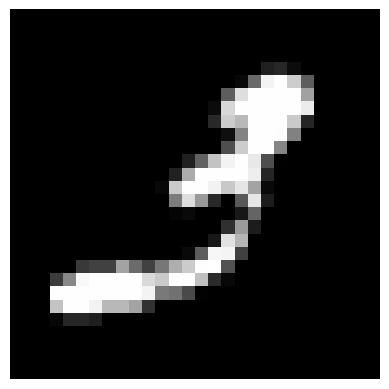

In [ ]:
plt.axis('off')
plt.imshow(-images[0].numpy().squeeze(), cmap='gray_r')

Display a grid of sample images:

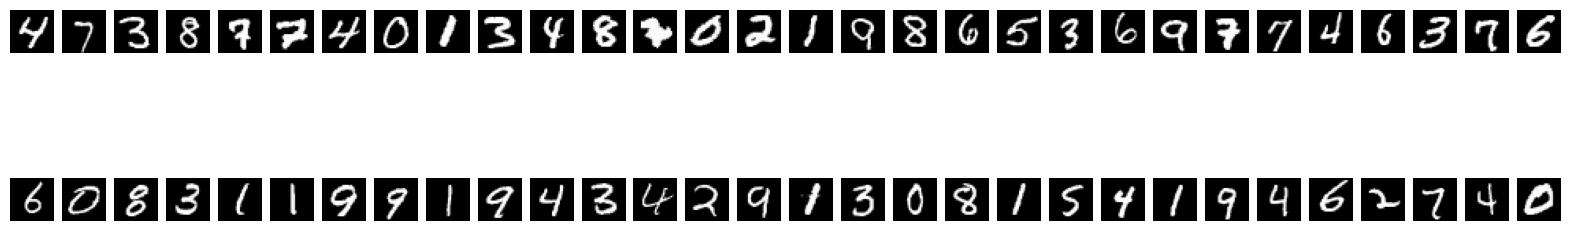

In [ ]:
figure = plt.figure(figsize=(20,4))
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(2, 30, index)
    plt.axis('off')
    plt.imshow(-images[index].numpy().squeeze(), cmap='gray_r')

### Now we start defining a model

In [ ]:
# Layer details for the neural network
input_size = 784
hidden_size = 16
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.Sigmoid(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.Sigmoid(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1))

We will also need a Cost function:

In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        ...,
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012]])


### Now let's train the network!

Define an optimizer strategy: SGD

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

Do a single pass first to see stuff:

Initial weights -  Parameter containing:
tensor([[ 0.0096, -0.0220,  0.0027,  ...,  0.0135, -0.0261,  0.0347],
        [ 0.0046, -0.0014,  0.0172,  ..., -0.0221, -0.0035,  0.0138],
        [ 0.0248,  0.0235, -0.0270,  ..., -0.0187,  0.0283, -0.0206],
        ...,
        [ 0.0145,  0.0159,  0.0192,  ..., -0.0149,  0.0322, -0.0316],
        [-0.0263, -0.0204, -0.0032,  ..., -0.0077, -0.0141, -0.0124],
        [ 0.0126, -0.0195, -0.0011,  ..., -0.0282,  0.0307,  0.0180]],
       requires_grad=True)
Gradient - tensor([[-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0026,  0.0026,  0.0026,  ...,  0.0026,  0.0026,  0.0026]])


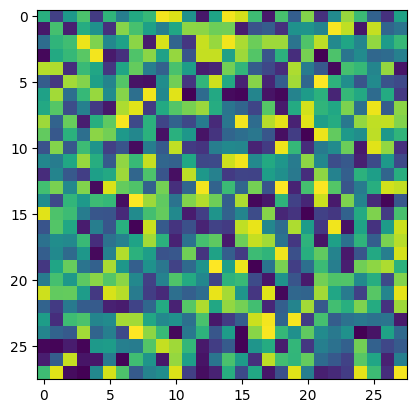

In [ ]:
print('Initial weights - ', model[0].weight)
plt.imshow(model[0].weight[0].reshape(28,28).detach().numpy())
images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Now perform the optimizing step:

Updated weights -  Parameter containing:
tensor([[ 0.0096, -0.0220,  0.0027,  ...,  0.0135, -0.0261,  0.0347],
        [ 0.0046, -0.0014,  0.0172,  ..., -0.0221, -0.0035,  0.0138],
        [ 0.0248,  0.0235, -0.0270,  ..., -0.0186,  0.0283, -0.0206],
        ...,
        [ 0.0145,  0.0159,  0.0192,  ..., -0.0149,  0.0322, -0.0316],
        [-0.0263, -0.0204, -0.0032,  ..., -0.0077, -0.0141, -0.0124],
        [ 0.0126, -0.0195, -0.0012,  ..., -0.0282,  0.0306,  0.0180]],
       requires_grad=True)


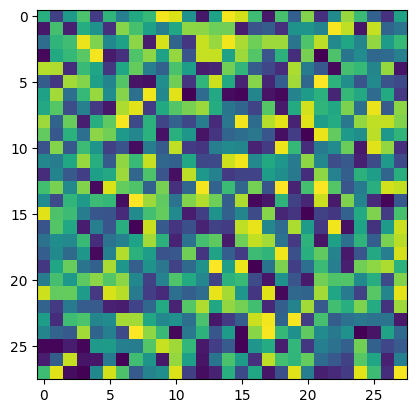

In [ ]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

plt.imshow(model[0].weight[0].reshape(28,28).detach().numpy())

### Now run it for N epochs:

In [ ]:
time0 = time()
epochs = 20
lossforplot = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        lossforplot.append(running_loss/len(trainloader))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6488614530959872
Epoch 1 - Training loss: 0.6007965402498937
Epoch 2 - Training loss: 0.558930079724743
Epoch 3 - Training loss: 0.5223831797141765
Epoch 4 - Training loss: 0.4899225298529749
Epoch 5 - Training loss: 0.4611772653072882
Epoch 6 - Training loss: 0.43554482710704623
Epoch 7 - Training loss: 0.41292519864242977
Epoch 8 - Training loss: 0.3932507559974819
Epoch 9 - Training loss: 0.3756812330184461
Epoch 10 - Training loss: 0.36051699906778234
Epoch 11 - Training loss: 0.3471091422540293
Epoch 12 - Training loss: 0.3347609775152796
Epoch 13 - Training loss: 0.32460311239462164
Epoch 14 - Training loss: 0.31519249712289776
Epoch 15 - Training loss: 0.30690846164057506
Epoch 16 - Training loss: 0.2992254577116417
Epoch 17 - Training loss: 0.2920665646841658
Epoch 18 - Training loss: 0.2858422296419581
Epoch 19 - Training loss: 0.28054191934655726

Training Time (in minutes) = 4.372759298483531


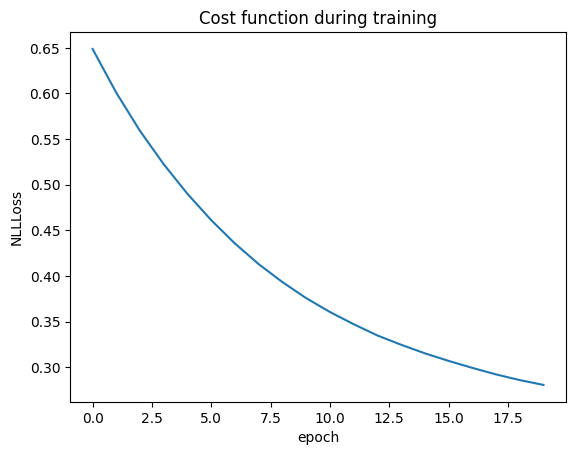

In [ ]:
xs = [x for x in range(len(lossforplot))]

plt.plot(xs, lossforplot)
plt.xlabel('epoch')
plt.ylabel('NLLLoss')
plt.title('Cost function during training')
plt.show()

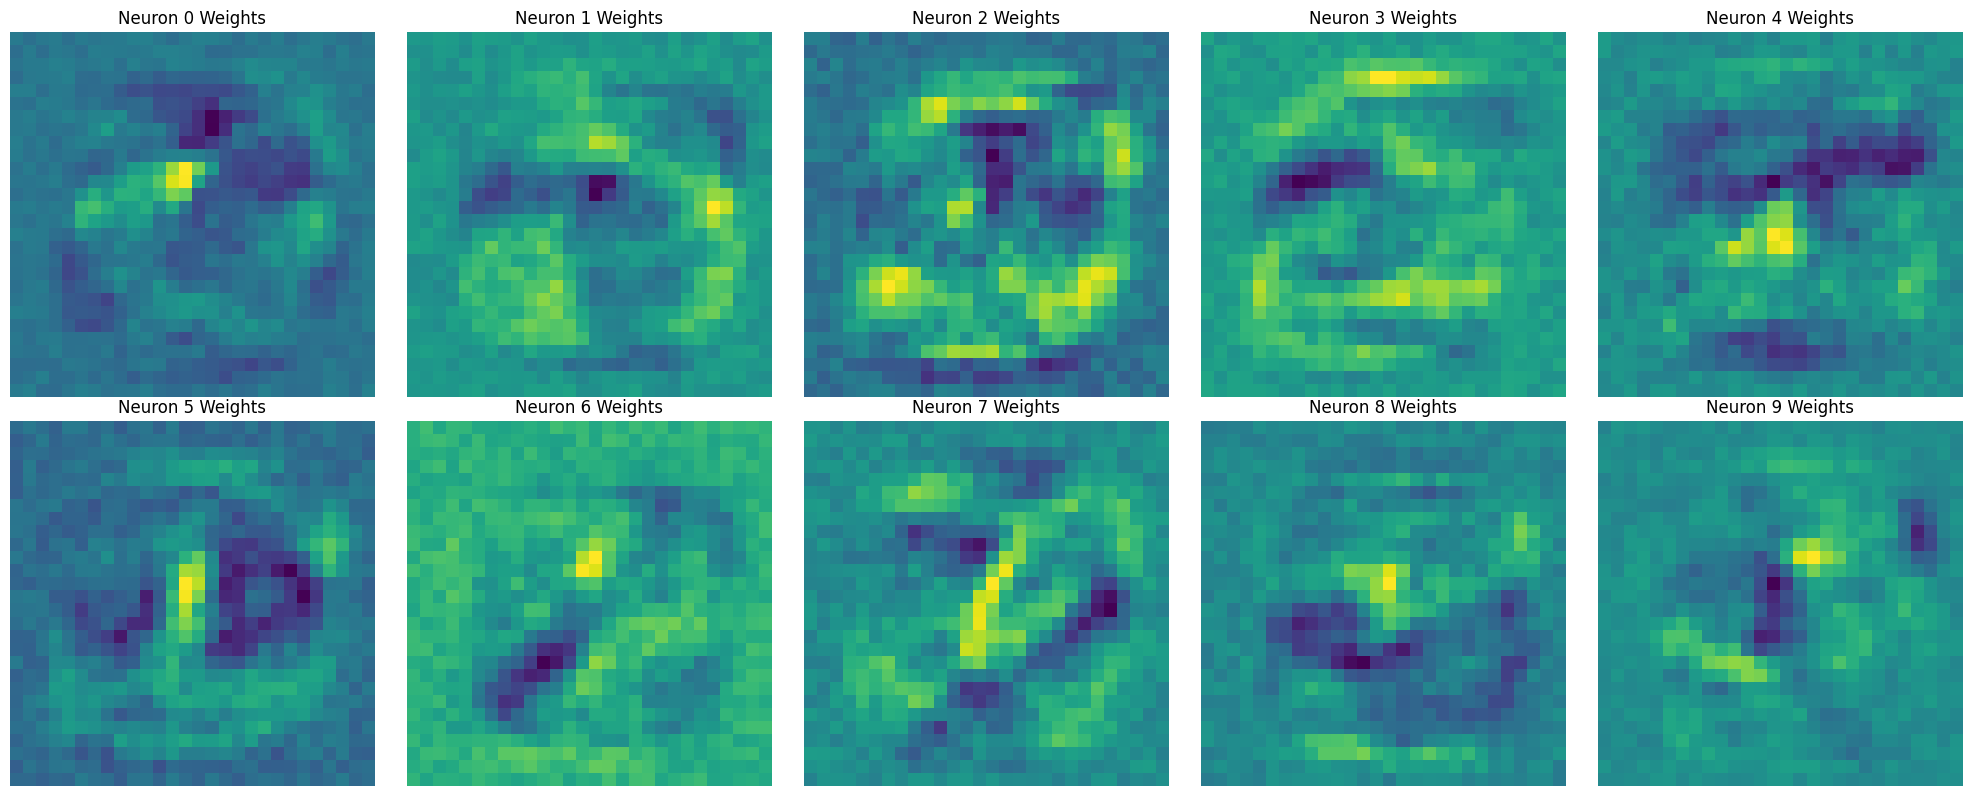

In [ ]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Adjust figsize as needed

# Extract weights from the model and detach them from computation graph
weights = model[0].weight.detach().cpu().numpy()  # Move to CPU if using CUDA

# Plot each weight visualization
for i in range(10):  # Assuming the first 3 weights are to be visualized
    row, col = divmod(i, 5)  # Compute row and column index (0-4, 5-9)
    axes[row, col].imshow(weights[i].reshape(28, 28))  # Reshape and display
    axes[row, col].set_title(f'Neuron {i} Weights')
    axes[row, col].axis('off')  # Hide axes for better visualization

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

Save the model for posterity:

In [ ]:
# Additional information
EPOCH = epochs-1
PATH = "my_mnist_model.pt"
LOSS = running_loss

torch.save({
            'epoch': EPOCH,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': LOSS,
            }, PATH)

# Testing time!

Try for yourself:

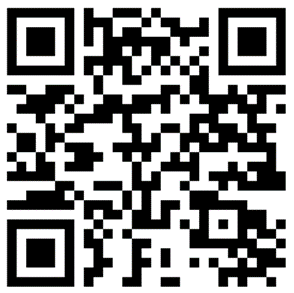

N=1:

In [ ]:
#Define a helper function for a nice way of visualising the prediction
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(-img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.invert_yaxis()
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    plt.show()

Predicted Digit = 7


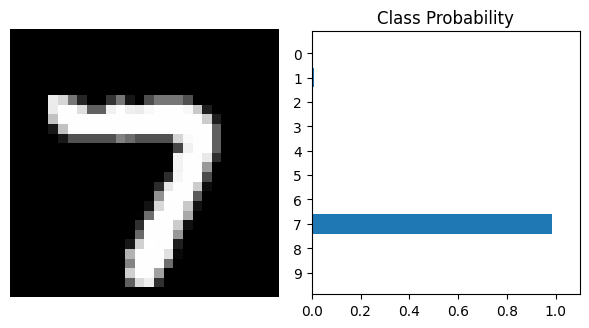

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Now for a larger testset (10000):

In [ ]:
correct_count, all_count = 0, 0
mistakes = []
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9195


Show some samples of mistakes:

Predicted Digit = 3 while it should be 1


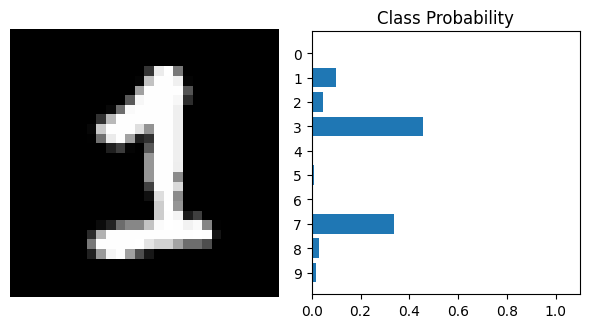

Predicted Digit = 9 while it should be 2


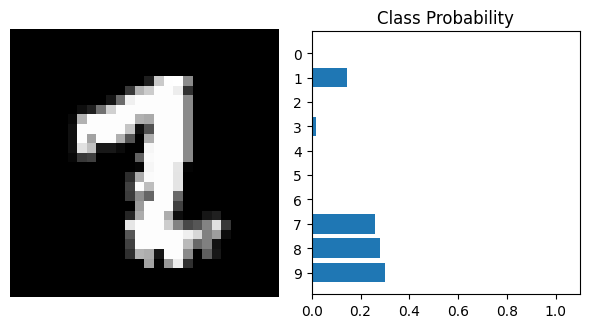

Predicted Digit = 3 while it should be 5


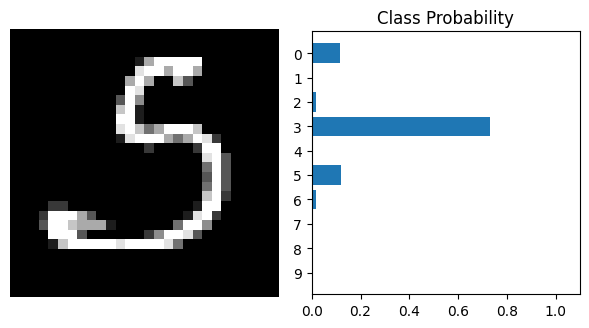

Predicted Digit = 5 while it should be 9


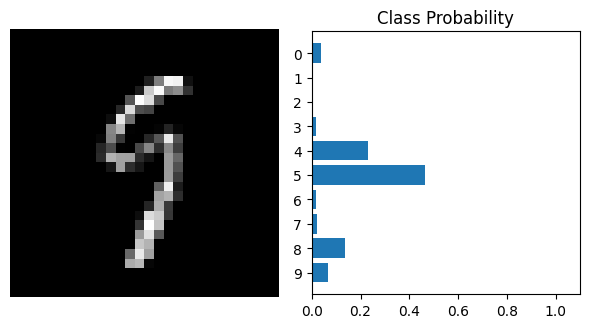

Predicted Digit = 3 while it should be 8


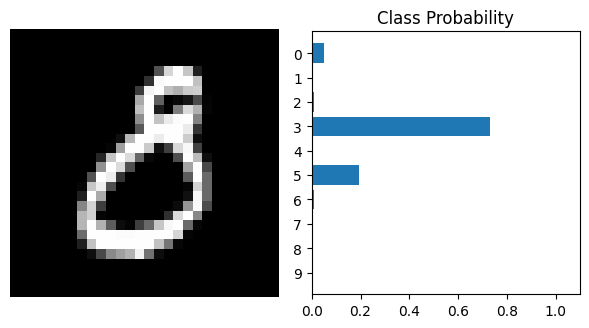

Predicted Digit = 4 while it should be 9


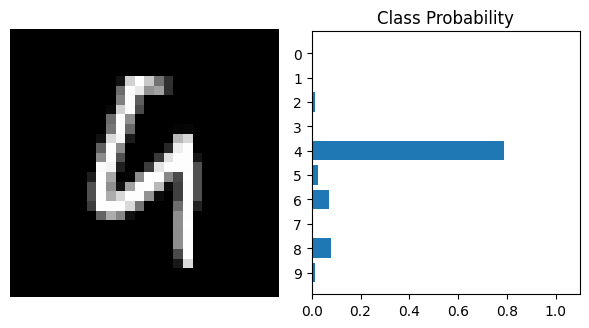

Predicted Digit = 4 while it should be 9


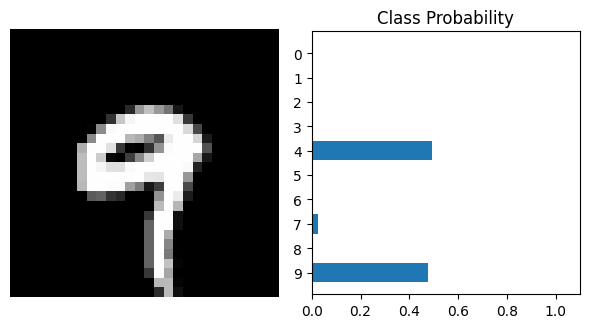

Predicted Digit = 8 while it should be 9


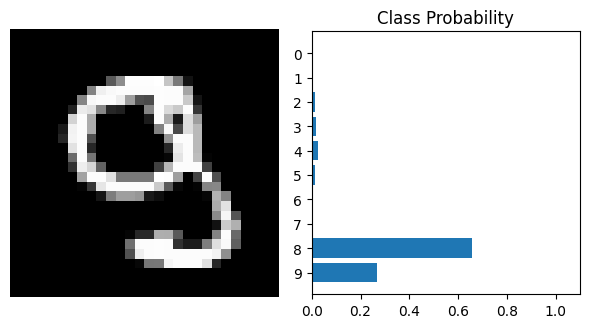

Predicted Digit = 5 while it should be 8


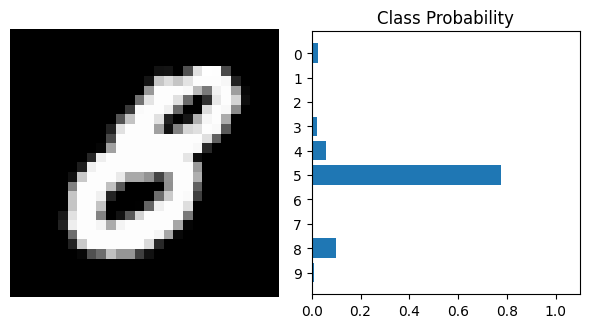

Predicted Digit = 7 while it should be 9


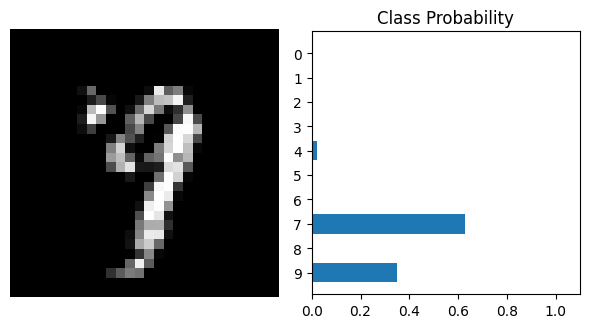

Predicted Digit = 4 while it should be 9


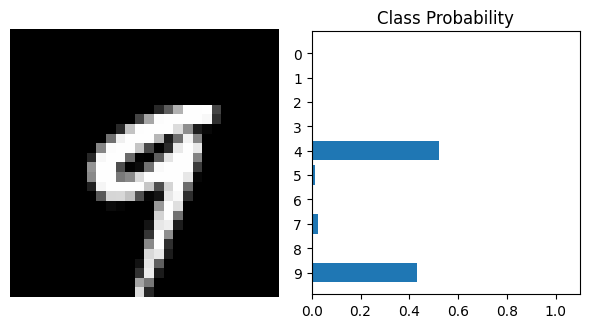

Predicted Digit = 9 while it should be 7


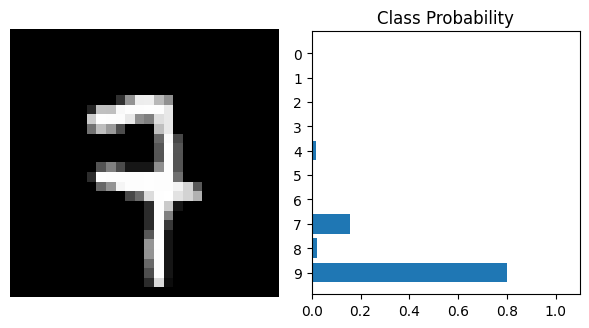

Number Of Images Tested = 128

Model Accuracy = 0.90625


In [ ]:
correct_count, all_count = 0, 0
mistakes = []
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        else:
            print(f"Predicted Digit = {pred_label} while it should be {true_label}")
            view_classify(img.view(1, 28, 28), ps)
        all_count += 1
    if all_count-correct_count >10: break
print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))